In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [53]:
data=pd.read_fwf("Standford.txt")

In [54]:
data.shape

(240, 25)

In [55]:
with open('Standford.txt','r') as file:
    header = file.readline()
    data=[]
    for row in file.readlines()[1:]:
        row = row.split()[1:]
        data.append(row)
    data = np.array(data,dtype='int')

In [56]:
df = pd.DataFrame(data,columns=np.array(header.split(),dtype=object))
df.isnull().sum()

"distant"    0
"talkatv"    0
"carelss"    0
"hardwrk"    0
"anxious"    0
"agreebl"    0
"tense"      0
"kind"       0
"opposng"    0
"relaxed"    0
"disorgn"    0
"outgoin"    0
"approvn"    0
"shy"        0
"discipl"    0
"harsh"      0
"persevr"    0
"friendl"    0
"worryin"    0
"respnsi"    0
"contrar"    0
"sociabl"    0
"lazy"       0
"coopera"    0
"quiet"      0
"organiz"    0
"criticl"    0
"lax"        0
"laidbck"    0
"withdrw"    0
"givinup"    0
"easygon"    0
dtype: int64

In [57]:
scaler=StandardScaler()

In [58]:
dff = scaler.fit_transform(df)
dff = pd.DataFrame(data=df,columns=df.columns)
dff.head(10)

,"""distant""","""talkatv""","""carelss""","""hardwrk""","""anxious""","""agreebl""","""tense""","""kind""","""opposng""","""relaxed""",...,"""lazy""","""coopera""","""quiet""","""organiz""","""criticl""","""lax""","""laidbck""","""withdrw""","""givinup""","""easygon"""
0,3,8,2,7,5,8,4,8,5,7,...,2,7,6,6,4,3,7,2,2,7
1,6,6,2,5,1,8,2,9,2,8,...,5,8,7,4,5,5,7,6,2,8
2,3,7,6,7,8,8,2,8,3,7,...,3,8,4,7,6,6,6,4,3,7
3,7,3,3,5,8,6,7,2,3,3,...,6,6,7,5,5,3,3,7,5,5
4,7,6,7,6,7,8,7,8,5,5,...,5,7,8,6,6,4,4,6,4,7
5,3,6,8,6,6,7,3,5,3,7,...,6,6,4,4,6,9,9,2,3,8
6,7,6,2,9,7,8,6,7,2,4,...,4,8,6,6,4,3,2,5,6,6
7,2,6,2,8,2,7,4,7,4,8,...,3,8,5,7,7,3,6,3,1,7
8,4,7,3,6,3,7,3,7,5,6,...,3,7,5,6,5,3,4,4,2,5
9,3,5,2,8,3,7,3,5,4,5,...,4,7,7,8,7,5,5,6,2,7


In [59]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df2)
print("chi_square_value:",chi_square_value)
print("p_value:",p_value)

chi_square_value: 4054.190370410808
p_value: 0.0


In [60]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
print("kmo_test:",kmo_model)

kmo_test: 0.8412492848324344


In [61]:
from factor_analyzer.factor_analyzer import FactorAnalyzer
factoranalyzer = FactorAnalyzer(rotation = None,impute = "drop",n_factors=df2.shape[1])
factoranalyzer.fit(df2)
eigenvalues,_ = factoranalyzer.get_eigenvalues()

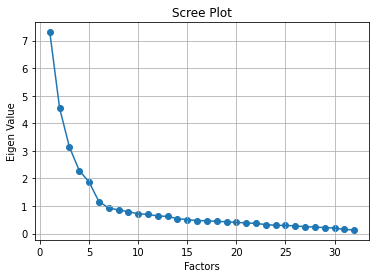

In [62]:
plt.scatter(range(1,df2.shape[1]+1),eigenvalues)
plt.plot(range(1,df2.shape[1]+1),eigenvalues)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

In [66]:
from factor_analyzer.factor_analyzer import FactorAnalyzer
factoranalysis = FactorAnalyzer(n_factors=6,rotation='varimax')
factoranalysis.fit(df)
with np.printoptions(suppress=True,precision=6):
    print(pd.DataFrame(factoranalysis.loadings_,index=df2.columns))
with np.printoptions(suppress=True,precision=6):
    print(pd.DataFrame(factoranalysis.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))
with np.printoptions(suppress=True,precision=6):
    print(pd.DataFrame(factoranalysis.get_uniquenesses(),index=df2.columns,columns=['Uniqueness']))
with np.printoptions(precision=4,suppress=True):
    print(pd.DataFrame(factoranalysis.get_communalities(),index=df2.columns,columns=['Communalities']))


                  0         1         2         3         4         5
"distant"  0.609023 -0.006397  0.073777 -0.094768  0.281190  0.137020
"talkatv" -0.759229  0.063613 -0.034403  0.096989  0.146306  0.132109
"carelss"  0.056199 -0.306297  0.070390 -0.035685  0.224019  0.630871
"hardwrk" -0.170320  0.680222  0.142007  0.121206  0.060352 -0.166850
"anxious"  0.170813 -0.022046  0.694277  0.153762  0.208925  0.114961
"agreebl" -0.022760  0.040577 -0.063251  0.631000 -0.193389  0.096209
"tense"    0.163876  0.025240  0.773851  0.013027  0.259396  0.061163
"kind"    -0.120286  0.223273  0.035653  0.606016 -0.177133 -0.220756
"opposng" -0.015363 -0.079381  0.089695 -0.134643  0.644569  0.068352
"relaxed" -0.023995 -0.125786 -0.691357  0.339581 -0.066510  0.045164
"disorgn"  0.017247 -0.368660 -0.023374  0.014760  0.074966  0.774337
"outgoin" -0.829508  0.081210 -0.050024  0.244690  0.013635 -0.020429
"approvn" -0.270433  0.134104 -0.122642  0.495630 -0.127813 -0.032620
"shy"      0.707028 